In [1]:
import pickle
import copy
from experiments import *
from utils import *

Definitions

In [2]:
scenarios = {'cnn':['summarization_cnndm:temperature=0.3,device=cuda,'], 
             'xsum':['summarization_xsum:temperature=0.3,device=cuda,'], 
             'boolq:':['boolq:'],
             'civil_comments':['civil_comments:demographic=LGBTQ,',
                               'civil_comments:demographic=all,',
                               'civil_comments:demographic=black,',
                               'civil_comments:demographic=christian,',
                               'civil_comments:demographic=female,',
                               'civil_comments:demographic=male,',
                               'civil_comments:demographic=muslim,',
                               'civil_comments:demographic=other_religions,',
                               'civil_comments:demographic=white,'],
             'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,':['commonsense:dataset=hellaswag,method=multiple_choice_separate_original,'],
             'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,':['commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,'],
             'imdb:':['imdb:'],
             'mmlu':['mmlu:subject=abstract_algebra,method=multiple_choice_joint,',
                     'mmlu:subject=college_chemistry,method=multiple_choice_joint,',
                     'mmlu:subject=computer_security,method=multiple_choice_joint,',
                     'mmlu:subject=econometrics,method=multiple_choice_joint,',
                     'mmlu:subject=us_foreign_policy,method=multiple_choice_joint,'],
             'msmarco:track=regular,valid_topk=30,':['msmarco:track=regular,valid_topk=30,'],
             #'msmarco:track=trec,valid_topk=30,':['msmarco:track=trec,valid_topk=30,'],
             'narrative_qa:':['narrative_qa:'],
             'natural_qa:mode=closedbook,':['natural_qa:mode=closedbook,'],
             'natural_qa:mode=openbook_longans,':['natural_qa:mode=openbook_longans,'],
             'quac:':['quac:'],
             'raft':['raft:subset=ade_corpus_v2,',
                     'raft:subset=banking_77,',
                     'raft:subset=neurips_impact_statement_risks,',
                     'raft:subset=one_stop_english,',
                     'raft:subset=overruling,',
                     'raft:subset=semiconductor_org_types,',
                     'raft:subset=systematic_review_inclusion,',
                     'raft:subset=tai_safety_research,',
                     'raft:subset=terms_of_service,',
                     'raft:subset=tweet_eval_hate,',
                     'raft:subset=twitter_complaints,'],
             'truthful_qa:task=mc_single,method=multiple_choice_joint,':['truthful_qa:task=mc_single,method=multiple_choice_joint,']}
            
scenarios_metrics = {'boolq:':'em', 
                     'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,':'em',
                     'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,':'em',
                     'imdb:':'em', 
                     'mmlu':'em', 
                     'msmarco:track=regular,valid_topk=30,':'RR@10', 
                     'msmarco:track=trec,valid_topk=30,':'NDCG@10', 
                     'narrative_qa:':'f1', 
                     'natural_qa:mode=closedbook,':'f1', 
                     'natural_qa:mode=openbook_longans,':'f1', 
                     'quac:':'f1', 
                     'raft':'em', 
                     'truthful_qa:task=mc_single,method=multiple_choice_joint,':'em'}

## Data

Loading data

In [3]:
with open('data/helm.pickle', 'rb') as handle:
    data = pickle.load(handle)

## Results

In [4]:
device = 'cuda'
iterations = 10
Ds = [5, 10, 15, 20] #

set_of_rows = [[0,1,2,3], #ai21
               [5,6,7,8,9,10,11], #cohere
               [4,12,13], #anthropic+microsoft
               [14,15,16,17,18,19,20,21,22], #openai
               [23,24,25,26,27]] #together
set_of_rows

[[0, 1, 2, 3],
 [5, 6, 7, 8, 9, 10, 11],
 [4, 12, 13],
 [14, 15, 16, 17, 18, 19, 20, 21, 22],
 [23, 24, 25, 26, 27]]

In [5]:
data['models']

['ai21_j1-grande',
 'ai21_j1-grande-v2-beta',
 'ai21_j1-jumbo',
 'ai21_j1-large',
 'anthropic_stanford-online-all-v4-s3',
 'cohere_command-medium-beta',
 'cohere_command-xlarge-beta',
 'cohere_large-20220720',
 'cohere_medium-20220720',
 'cohere_medium-20221108',
 'cohere_xlarge-20220609',
 'cohere_xlarge-20221108',
 'microsoft_TNLGv2_530B',
 'microsoft_TNLGv2_7B',
 'openai_ada',
 'openai_babbage',
 'openai_curie',
 'openai_davinci',
 'openai_text-ada-001',
 'openai_text-babbage-001',
 'openai_text-curie-001',
 'openai_text-davinci-002',
 'openai_text-davinci-003',
 'together_bloom',
 'together_gpt-j-6b',
 'together_gpt-neox-20b',
 'together_opt-175b',
 'together_opt-66b']

### Predicting accuracy

Full (one IRT model for all scenarios)

In [6]:
scenario_name = 'full' #we are evaluating all scenarios at once
chosen_scenarios = list(scenarios.keys())
sampling = {'random_sampling':False,'anchor_sampling':False,
            'anchor-irt_sampling':True,'disc_sampling':False}
results_full, accs_full = evaluate_scenarios(data, scenario_name, chosen_scenarios, scenarios, set_of_rows, Ds, iterations, device, bench='irt_helm', sampling = sampling)


Evaluating models [0, 1, 2, 3]

i) choosing optimal D


100%|████████████████████████████████████████████| 4/4 [12:18<00:00, 184.54s/it]


- opt D= 5 errors= [0.044579911983804656, 0.0453168327810513, 0.047692893828327226, 0.049759814361327995] 


ii) choosing optimal lambdas


100%|████████████████████████████████████████| 15/15 [00:00<00:00, 10540.22it/s]


{'random_gpirt': {'cnn': {10: 0.6106500153682252, 25: 0.7710186221163557, 50: 0.8389766601558348, 75: 0.8755169245268296, 100: 0.9143715646295693}, 'xsum': {10: 0.09864735668411334, 25: 0.27348288919988994, 50: 0.38082260331151807, 75: 0.4623254879248749, 100: 0.5845693496878107}, 'boolq:': {10: 0.09335207393175736, 25: 0.2281357754643307, 50: 0.35042482226473454, 75: 0.5616991102464602, 100: 0.6345438206318922}, 'civil_comments': {10: 0.06043252750157128, 25: 0.05845086140679586, 50: 0.1786826212729647, 75: 0.19488823789360563, 100: 0.28262542556346976}, 'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,': {10: 0.31853410497191076, 25: 0.49227117762582373, 50: 0.6283794731110073, 75: 0.7121305377685969, 100: 0.7645432827468794}, 'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,': {10: 0.037441018432384975, 25: 0.11296227042386832, 50: 0.2064591320881373, 75: 0.2877500866062527, 100: 0.4378412715932999}, 'imdb:': {10: 0.3455834566196065, 

100%|████████████████████████████████████████████| 5/5 [46:50<00:00, 562.12s/it]



Evaluating models [5, 6, 7, 8, 9, 10, 11]

i) choosing optimal D


100%|████████████████████████████████████████████| 4/4 [07:27<00:00, 111.82s/it]


- opt D= 5 errors= [0.05381872300941188, 0.05182277303935221, 0.0543264667069326, 0.055148286293135375] 


ii) choosing optimal lambdas


100%|████████████████████████████████████████| 15/15 [00:00<00:00, 86898.56it/s]


{'random_gpirt': {'cnn': {10: 0.6610518609817138, 25: 0.8072254224646775, 50: 0.8785225668367399, 75: 0.8937106464814465, 100: 0.9277088214674661}, 'xsum': {10: 0.09944081342604813, 25: 0.3195316082037869, 50: 0.41825653509831506, 75: 0.47316650652983594, 100: 0.6150048528368004}, 'boolq:': {10: 0.11846831194711877, 25: 0.2949469583682618, 50: 0.46590226145881525, 75: 0.5826196503175075, 100: 0.7132711909906536}, 'civil_comments': {10: 0.08491584831831712, 25: 0.09197570117821549, 50: 0.234790288410495, 75: 0.2608946863514086, 100: 0.35685385954451615}, 'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,': {10: 0.25818546679056903, 25: 0.5467112814950147, 50: 0.6332585477757603, 75: 0.6702189850115379, 100: 0.7333246400742697}, 'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,': {10: 0.024008241766988292, 25: 0.062284268597891254, 50: 0.125930499845648, 75: 0.16469324761470472, 100: 0.2513819617958541}, 'imdb:': {10: 0.4436944470167312, 25

100%|██████████████████████████████████████████| 5/5 [1:22:13<00:00, 986.68s/it]



Evaluating models [4, 12, 13]

i) choosing optimal D


100%|████████████████████████████████████████████| 4/4 [07:55<00:00, 118.88s/it]


- opt D= 10 errors= [0.04014776870666264, 0.03758734187511835, 0.03701439713524953, 0.03676330704824828] 


ii) choosing optimal lambdas


100%|████████████████████████████████████████| 15/15 [00:00<00:00, 83220.32it/s]


{'random_gpirt': {'cnn': {10: 0.2549821029714129, 25: 0.413466989906584, 50: 0.5465515757118325, 75: 0.6067138264650712, 100: 0.6911110256582054}, 'xsum': {10: 0.24470752649763763, 25: 0.5556980597383003, 50: 0.6696893928382972, 75: 0.7382104612759492, 100: 0.8129353885831808}, 'boolq:': {10: 0.125007687981732, 25: 0.28092298979672525, 50: 0.4662429937316761, 75: 0.5922756463654774, 100: 0.7160767717203982}, 'civil_comments': {10: 0.01501353618774274, 25: 0.014502386725318023, 50: 0.049092742146797694, 75: 0.058772935438885635, 100: 0.08437021832849001}, 'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,': {10: 0.038308120530924, 25: 0.10307157308563852, 50: 0.15249034759329524, 75: 0.18142315558232303, 100: 0.2301043490968336}, 'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,': {10: 0.019325560683816224, 25: 0.049747221600117554, 50: 0.1091624755801577, 75: 0.14740001213849918, 100: 0.22660105599375033}, 'imdb:': {10: 0.4876902357948003

100%|████████████████████████████████████████████| 5/5 [36:12<00:00, 434.56s/it]



Evaluating models [14, 15, 16, 17, 18, 19, 20, 21, 22]

i) choosing optimal D


100%|████████████████████████████████████████████| 4/4 [07:19<00:00, 109.77s/it]


- opt D= 5 errors= [0.045810498090451464, 0.04502040451789275, 0.046899226917154604, 0.04578801553785239] 


ii) choosing optimal lambdas


/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 69 is empty! self.labels_[self.medoid_indices_[69]] may not be labeled with its corresponding cluster (69).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 70 is empty! self.labels_[self.medoid_indices_[70]] may not be labeled with its corresponding cluster (70).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 71 is empty! self.labels_[self.medoid_indices_[71]] may not be labeled with its corresponding cluster (71).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 72 is empty! self.labels_[self.medoid_indices_[72]] may not be labeled with its corresponding cluster (72

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 72 is empty! self.labels_[self.medoid_indices_[72]] may not be labeled with its corresponding cluster (72).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 73 is empty! self.labels_[self.medoid_indices_[73]] may not be labeled with its corresponding cluster (73).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 74 is empty! self.labels_[self.medoid_indices_[74]] may not be labeled with its corresponding cluster (74).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 69 is empty! self.labels_[self.medoid_indices_[69]] may not be labeled with its corresponding cluster (69

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 73 is empty! self.labels_[self.medoid_indices_[73]] may not be labeled with its corresponding cluster (73).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 72 is empty! self.labels_[self.medoid_indices_[72]] may not be labeled with its corresponding cluster (72).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 74 is empty! self.labels_[self.medoid_indices_[74]] may not be labeled with its corresponding cluster (74).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 74 is empty! self.labels_[self.medoid_indices_[74]] may not be labeled with its corresponding cluster (74

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 72 is empty! self.labels_[self.medoid_indices_[72]] may not be labeled with its corresponding cluster (72).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 73 is empty! self.labels_[self.medoid_indices_[73]] may not be labeled with its corresponding cluster (73).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 74 is empty! self.labels_[self.medoid_indices_[74]] may not be labeled with its corresponding cluster (74).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 69 is empty! self.labels_[self.medoid_indices_[69]] may not be labeled with its corresponding cluster (69

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 81 is empty! self.labels_[self.medoid_indices_[81]] may not be labeled with its corresponding cluster (81).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 82 is empty! self.labels_[self.medoid_indices_[82]] may not be labeled with its corresponding cluster (82).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 83 is empty! self.labels_[self.medoid_indices_[83]] may not be labeled with its corresponding cluster (83).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 69 is empty! self.labels_[self.medoid_indices_[69]] may not be labeled with its corresponding cluster (69

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 79 is empty! self.labels_[self.medoid_indices_[79]] may not be labeled with its corresponding cluster (79).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 79 is empty! self.labels_[self.medoid_indices_[79]] may not be labeled with its corresponding cluster (79).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 94 is empty! self.labels_[self.medoid_indices_[94]] may not be labeled with its corresponding cluster (94).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 80 is empty! self.labels_[self.medoid_indices_[80]] may not be labeled with its corresponding cluster (80

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 94 is empty! self.labels_[self.medoid_indices_[94]] may not be labeled with its corresponding cluster (94).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 91 is empty! self.labels_[self.medoid_indices_[91]] may not be labeled with its corresponding cluster (91).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 95 is empty! self.labels_[self.medoid_indices_[95]] may not be labeled with its corresponding cluster (95).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 92 is empty! self.labels_[self.medoid_indices_[92]] may not be labeled with its corresponding cluster (92

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 87 is empty! self.labels_[self.medoid_indices_[87]] may not be labeled with its corresponding cluster (87).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 88 is empty! self.labels_[self.medoid_indices_[88]] may not be labeled with its corresponding cluster (88).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 89 is empty! self.labels_[self.medoid_indices_[89]] may not be labeled with its corresponding cluster (89).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 90 is empty! self.labels_[self.medoid_indices_[90]] may not be labeled with its corresponding cluster (90

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 75 is empty! self.labels_[self.medoid_indices_[75]] may not be labeled with its corresponding cluster (75).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 80 is empty! self.labels_[self.medoid_indices_[80]] may not be labeled with its corresponding cluster (80).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 76 is empty! self.labels_[self.medoid_indices_[76]] may not be labeled with its corresponding cluster (76).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 77 is empty! self.labels_[self.medoid_indices_[77]] may not be labeled with its corresponding cluster (77

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 89 is empty! self.labels_[self.medoid_indices_[89]] may not be labeled with its corresponding cluster (89).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 87 is empty! self.labels_[self.medoid_indices_[87]] may not be labeled with its corresponding cluster (87).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 72 is empty! self.labels_[self.medoid_indices_[72]] may not be labeled with its corresponding cluster (72).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 81 is empty! self.labels_[self.medoid_indices_[81]] may not be labeled with its corresponding cluster (81

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 94 is empty! self.labels_[self.medoid_indices_[94]] may not be labeled with its corresponding cluster (94).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 89 is empty! self.labels_[self.medoid_indices_[89]] may not be labeled with its corresponding cluster (89).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 79 is empty! self.labels_[self.medoid_indices_[79]] may not be labeled with its corresponding cluster (79).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 80 is empty! self.labels_[self.medoid_indices_[80]] may not be labeled with its corresponding cluster (80

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 98 is empty! self.labels_[self.medoid_indices_[98]] may not be labeled with its corresponding cluster (98).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 78 is empty! self.labels_[self.medoid_indices_[78]] may not be labeled with its corresponding cluster (78).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 99 is empty! self.labels_[self.medoid_indices_[99]] may not be labeled with its corresponding cluster (99).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 88 is empty! self.labels_[self.medoid_indices_[88]] may not be labeled with its corresponding cluster (88

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 97 is empty! self.labels_[self.medoid_indices_[97]] may not be labeled with its corresponding cluster (97).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 98 is empty! self.labels_[self.medoid_indices_[98]] may not be labeled with its corresponding cluster (98).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 99 is empty! self.labels_[self.medoid_indices_[99]] may not be labeled with its corresponding cluster (99).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 69 is empty! self.labels_[self.medoid_indices_[69]] may not be labeled with its corresponding cluster (69

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 78 is empty! self.labels_[self.medoid_indices_[78]] may not be labeled with its corresponding cluster (78).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 90 is empty! self.labels_[self.medoid_indices_[90]] may not be labeled with its corresponding cluster (90).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 79 is empty! self.labels_[self.medoid_indices_[79]] may not be labeled with its corresponding cluster (79).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 91 is empty! self.labels_[self.medoid_indices_[91]] may not be labeled with its corresponding cluster (91

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 76 is empty! self.labels_[self.medoid_indices_[76]] may not be labeled with its corresponding cluster (76).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 94 is empty! self.labels_[self.medoid_indices_[94]] may not be labeled with its corresponding cluster (94).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 77 is empty! self.labels_[self.medoid_indices_[77]] may not be labeled with its corresponding cluster (77).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 78 is empty! self.labels_[self.medoid_indices_[78]] may not be labeled with its corresponding cluster (78

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 82 is empty! self.labels_[self.medoid_indices_[82]] may not be labeled with its corresponding cluster (82).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 90 is empty! self.labels_[self.medoid_indices_[90]] may not be labeled with its corresponding cluster (90).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 69 is empty! self.labels_[self.medoid_indices_[69]] may not be labeled with its corresponding cluster (69).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 91 is empty! self.labels_[self.medoid_indices_[91]] may not be labeled with its corresponding cluster (91

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 78 is empty! self.labels_[self.medoid_indices_[78]] may not be labeled with its corresponding cluster (78).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 69 is empty! self.labels_[self.medoid_indices_[69]] may not be labeled with its corresponding cluster (69).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 71 is empty! self.labels_[self.medoid_indices_[71]] may not be labeled with its corresponding cluster (71).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 70 is empty! self.labels_[self.medoid_indices_[70]] may not be labeled with its corresponding cluster (70

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 86 is empty! self.labels_[self.medoid_indices_[86]] may not be labeled with its corresponding cluster (86).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 80 is empty! self.labels_[self.medoid_indices_[80]] may not be labeled with its corresponding cluster (80).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 79 is empty! self.labels_[self.medoid_indices_[79]] may not be labeled with its corresponding cluster (79).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 81 is empty! self.labels_[self.medoid_indices_[81]] may not be labeled with its corresponding cluster (81

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 99 is empty! self.labels_[self.medoid_indices_[99]] may not be labeled with its corresponding cluster (99).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 72 is empty! self.labels_[self.medoid_indices_[72]] may not be labeled with its corresponding cluster (72).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 87 is empty! self.labels_[self.medoid_indices_[87]] may not be labeled with its corresponding cluster (87).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 89 is empty! self.labels_[self.medoid_indices_[89]] may not be labeled with its corresponding cluster (89

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 83 is empty! self.labels_[self.medoid_indices_[83]] may not be labeled with its corresponding cluster (83).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 97 is empty! self.labels_[self.medoid_indices_[97]] may not be labeled with its corresponding cluster (97).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 98 is empty! self.labels_[self.medoid_indices_[98]] may not be labeled with its corresponding cluster (98).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 99 is empty! self.labels_[self.medoid_indices_[99]] may not be labeled with its corresponding cluster (99

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 82 is empty! self.labels_[self.medoid_indices_[82]] may not be labeled with its corresponding cluster (82).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 83 is empty! self.labels_[self.medoid_indices_[83]] may not be labeled with its corresponding cluster (83).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 84 is empty! self.labels_[self.medoid_indices_[84]] may not be labeled with its corresponding cluster (84).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 85 is empty! self.labels_[self.medoid_indices_[85]] may not be labeled with its corresponding cluster (85

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 72 is empty! self.labels_[self.medoid_indices_[72]] may not be labeled with its corresponding cluster (72).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 81 is empty! self.labels_[self.medoid_indices_[81]] may not be labeled with its corresponding cluster (81).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 73 is empty! self.labels_[self.medoid_indices_[73]] may not be labeled with its corresponding cluster (73).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 82 is empty! self.labels_[self.medoid_indices_[82]] may not be labeled with its corresponding cluster (82

/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 96 is empty! self.labels_[self.medoid_indices_[96]] may not be labeled with its corresponding cluster (96).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 90 is empty! self.labels_[self.medoid_indices_[90]] may not be labeled with its corresponding cluster (90).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 97 is empty! self.labels_[self.medoid_indices_[97]] may not be labeled with its corresponding cluster (97).
  warnings.warn(
/home/skunk/miniconda3/envs/efficbench/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 91 is empty! self.labels_[self.medoid_indices_[91]] may not be labeled with its corresponding cluster (91

{'random_gpirt': {'cnn': {10: 0.7981014563302042, 25: 0.8928554857012618, 50: 0.9270621875903989, 75: 0.9367298647977194, 100: 0.9577652846237644}, 'xsum': {10: 0.687856277716336, 25: 0.9240336633162429, 50: 0.9404259703610043, 75: 0.956940788945991, 100: 0.971895035727579}, 'boolq:': {10: 0.08507072056869927, 25: 0.21394794731593614, 50: 0.3893564366589294, 75: 0.4676844745683328, 100: 0.6506354735927121}, 'civil_comments': {10: 0.008987590976461622, 25: 0.00955082489651535, 50: 0.032505132507404715, 75: 0.037890956565051745, 100: 0.0547107408767016}, 'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,': {10: 0.05696276070460107, 25: 0.16326701377142527, 50: 0.23093781100047844, 75: 0.251087821576903, 100: 0.31913686432655486}, 'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,': {10: 0.015168299464183098, 25: 0.04033824393394894, 50: 0.08857951368250677, 75: 0.11245980040283471, 100: 0.1766916392994179}, 'imdb:': {10: 0.35531238498033246,

100%|█████████████████████████████████████████| 5/5 [1:47:35<00:00, 1291.05s/it]



Evaluating models [23, 24, 25, 26, 27]

i) choosing optimal D


100%|████████████████████████████████████████████| 4/4 [07:21<00:00, 110.48s/it]


- opt D= 10 errors= [0.045099761748160876, 0.03870655877906765, 0.041527588347013394, 0.03875408709946499] 


ii) choosing optimal lambdas


100%|████████████████████████████████████████| 15/15 [00:00<00:00, 78447.08it/s]


{'random_gpirt': {'cnn': {10: 0.566773360920085, 25: 0.7289696836864386, 50: 0.8117821380289124, 75: 0.8389879332564301, 100: 0.8864318964534943}, 'xsum': {10: 0.26126750934110515, 25: 0.6545851986875314, 50: 0.6985272267508639, 75: 0.7694198580709544, 100: 0.845717001619946}, 'boolq:': {10: 0.11414290267318566, 25: 0.2706618341081289, 50: 0.4570674916435115, 75: 0.547831437079304, 100: 0.7048659516836789}, 'civil_comments': {10: 0.01802282298444419, 25: 0.02157128364514985, 50: 0.06881397700239363, 75: 0.07793252420016537, 100: 0.11056003919866145}, 'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,': {10: 0.019441044795681973, 25: 0.056356354753347764, 50: 0.08935929656754404, 75: 0.10505085896600258, 100: 0.13587778336595202}, 'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,': {10: 0.007383485738188877, 25: 0.019106333791566746, 50: 0.04565395017757426, 75: 0.058373512722711775, 100: 0.09979044732126875}, 'imdb:': {10: 0.4309596833951

100%|████████████████████████████████████████████| 5/5 [56:07<00:00, 673.54s/it]


In [7]:
with open('results/results_full_helm.pickle', 'wb') as handle:
    pickle.dump(results_full, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('results/accs_full_helm.pickle', 'wb') as handle:
    pickle.dump(accs_full, handle, protocol=pickle.HIGHEST_PROTOCOL)

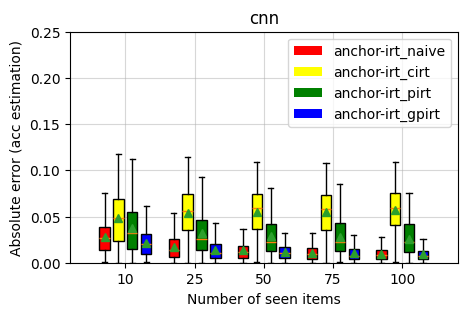

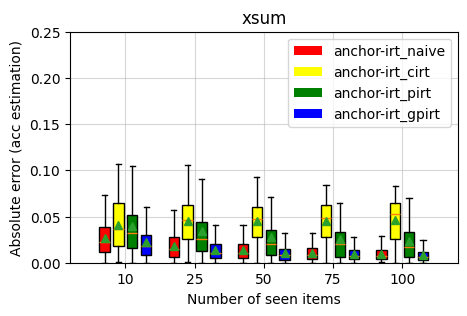

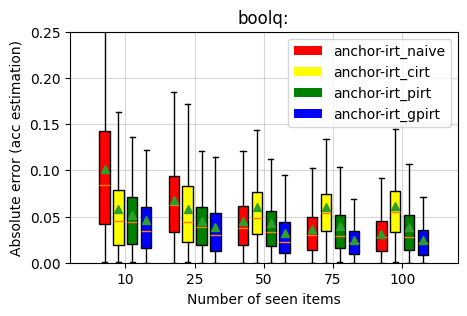

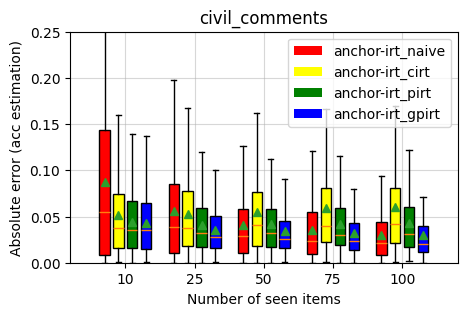

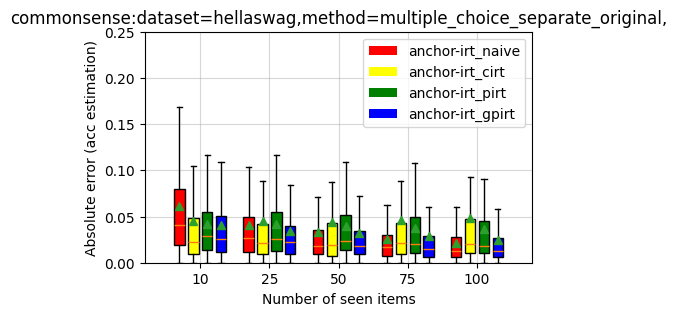

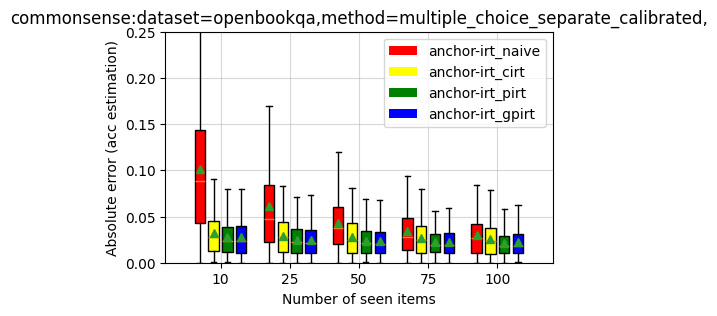

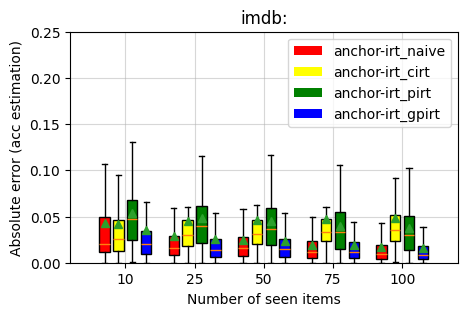

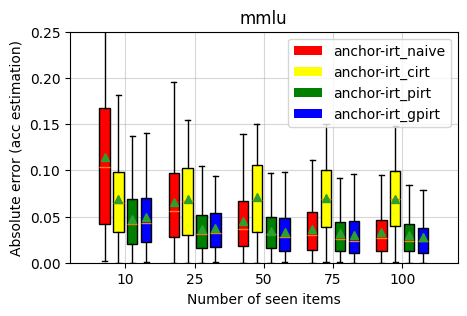

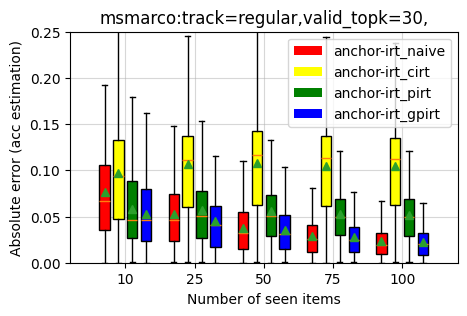

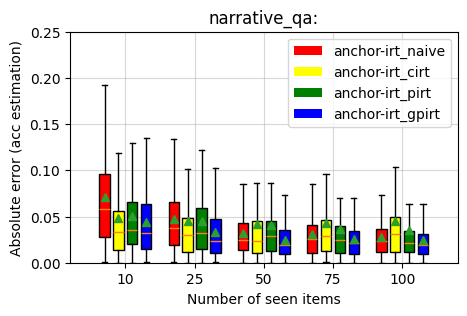

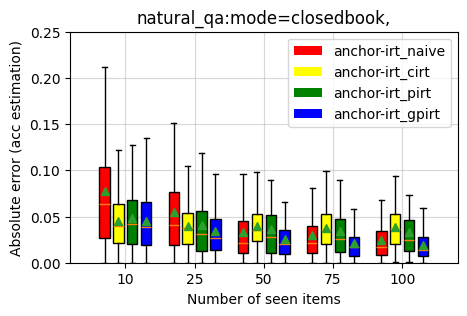

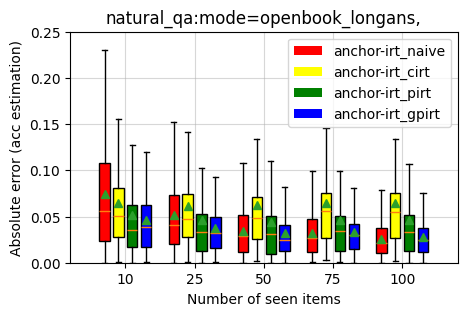

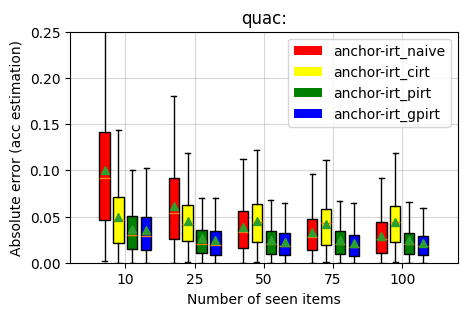

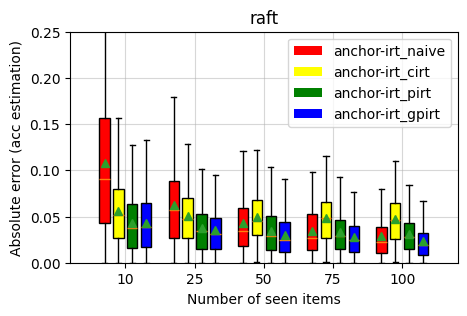

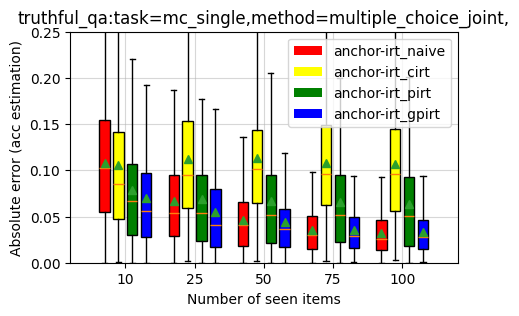

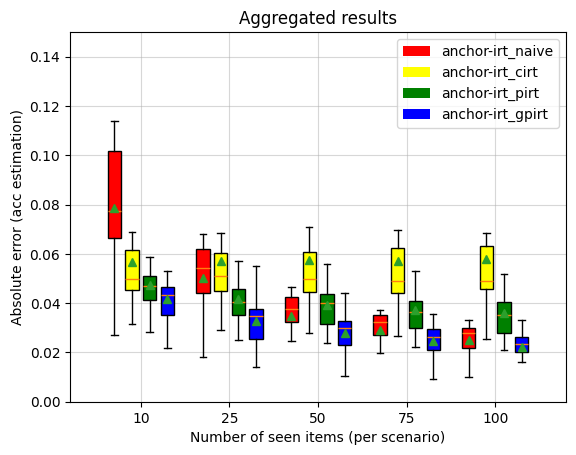

In [8]:
methods = ['anchor-irt_naive', 'anchor-irt_cirt', 'anchor-irt_pirt', 'anchor-irt_gpirt']
plot_results(results_full, scenarios.keys(), methods = methods)
plot_agg_results(results_full, scenarios.keys(), methods = methods)

In [9]:
methods = ['anchor_naive', 'anchor_cirt', 'anchor_pirt', 'anchor_gpirt']
plot_results(results_full, scenarios.keys(), methods = methods)
plot_agg_results(results_full, scenarios.keys(), methods = methods)

KeyError: 'cnn'

In [ ]:
methods = ['random_naive', 'random_cirt', 'random_pirt', 'random_gpirt']
plot_results(results_full, scenarios.keys(), methods = methods)
plot_agg_results(results_full, scenarios.keys(), methods = methods)

In [ ]:
import pickle

with open('results/results_full_helm.pickle', 'rb') as handle:
    results = pickle.load(handle)

In [ ]:
for sce in scenarios.keys():
    y=np.stack([results[m][100]['random_pirt'][sce] for m in results.keys()]).mean(axis=1)
    x=np.vstack([data['data'][s]['correctness'] for s in scenarios[sce]]).mean(axis=0)
    plt.plot(x,y,'bo')
    plt.xlabel('acc')
    plt.xlabel('error')
    plt.title(sce)
    plt.savefig(f'plots/scenario-{sce}.png', bbox_inches='tight', dpi=300, transparent=False)
    plt.show()